#**K-Means**

3. Implementação Prática em Python
Segue um exemplo de agrupamento de ocorrências baseado em:

   a)localização e

   b)tipo de crime

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import folium

# Simulação de dados de ocorrências
dados = {
    "latitude": np.random.uniform(-22.975, -22.825, 10),
    "longitude": np.random.uniform(-43.235, -43.120, 10),
    "tipo_crime": np.random.choice(["roubo", "furto", "violência"], 10),
    "hora": np.random.randint(0, 24, 10)
}
df = pd.DataFrame(dados)

# Pré-processamento
# Convertendo o tipo de crime em valores numéricos
df["tipo_crime_num"] = df["tipo_crime"].map({"roubo": 0, "furto": 1, "violência": 2})
scaler = StandardScaler()
X = scaler.fit_transform(df[["latitude", "longitude", "tipo_crime_num", "hora"]])

# Aplicando K-Means
kmeans = KMeans(n_clusters=4, random_state=42)
df["cluster"] = kmeans.fit_predict(X)

# Visualização no mapa
mapa = folium.Map(location=[-22.9068, -43.1729], zoom_start=12)

# Adicionando clusters no mapa
cores = ['red', 'blue', 'green', 'purple']
for _, linha in df.iterrows():
    folium.CircleMarker(
        location=[linha["latitude"], linha["longitude"]],
        radius=5,
        color=cores[linha["cluster"]],
        fill=True,
        fill_opacity=0.7,
        popup=f"Tipo: {linha['tipo_crime']}, Hora: {linha['hora']}h"
    ).add_to(mapa)
    # return mapa
# Salvar o mapa
mapa.save("mapa_clusters_rj.html")
print("Mapa salvo como mapa_clusters_rj.html")
mapa



Mapa salvo como mapa_clusters_rj.html


4. Resultados
Com o agrupamento de eventos:

É possível identificar áreas de alta criminalidade e eventos similares.

Esses padrões podem ser cruzados com o perfil dos policiais para alocar recursos de maneira eficiente:
Policiais mais experientes em áreas com maior índice de violência.
Reforço de patrulhas em horários e locais críticos.

Explicação do Código
Simulação de Dados:

Cria 100 registros de crimes simulados no Rio de Janeiro.
Inclui variáveis como latitude, longitude, tipo de crime e horário.
Clustering com K-Means:

Os dados são normalizados com StandardScaler.
K-Means é aplicado para identificar 4 clusters de eventos.
Visualização no Mapa:

Cada cluster é representado por uma cor no mapa interativo.
Informações como o tipo de crime e o horário aparecem nos popups.


#**Exemplo com PCA**
O PCA (Principal Component Analysis) é usado para reduzir a dimensionalidade dos dados, mantendo a maior parte da variabilidade. É útil para visualizar clusters gerados por técnicas como K-Means.

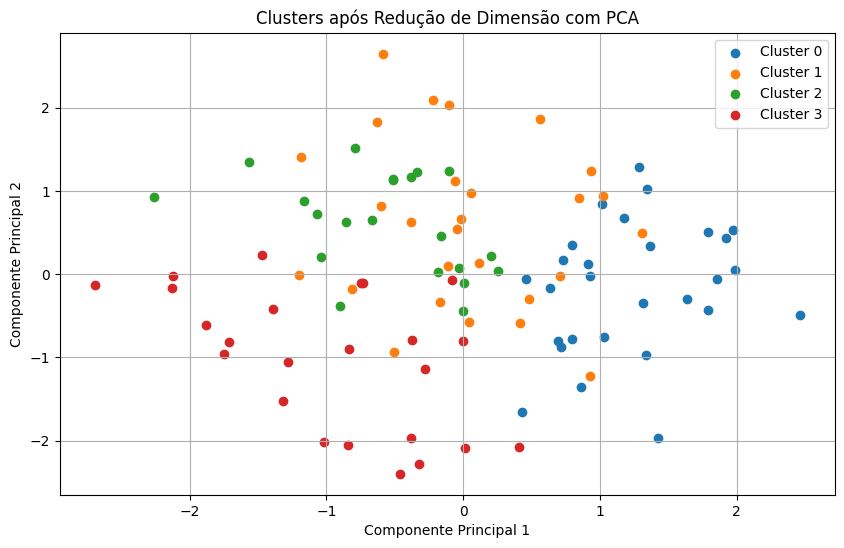

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Simulação de dados de ocorrências
dados = {
    "latitude": np.random.uniform(-22.975, -22.825, 100),
    "longitude": np.random.uniform(-43.235, -43.120, 100),
    "tipo_crime": np.random.choice(["roubo", "furto", "violência"], 100),
    "hora": np.random.randint(0, 24, 100)
}
df = pd.DataFrame(dados)

# Pré-processamento
# Convertendo o tipo de crime em valores numéricos
df["tipo_crime_num"] = df["tipo_crime"].map({"roubo": 0, "furto": 1, "violência": 2})
scaler = StandardScaler()
X = scaler.fit_transform(df[["latitude", "longitude", "tipo_crime_num", "hora"]])

# Clustering com K-Means
kmeans = KMeans(n_clusters=4, random_state=42)
df["cluster"] = kmeans.fit_predict(X)

# Aplicando PCA para reduzir para 2 dimensões
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
df["pca_1"] = X_pca[:, 0]
df["pca_2"] = X_pca[:, 1]

# Visualizando os clusters em um gráfico 2D
plt.figure(figsize=(10, 6))
for cluster in range(4):
    subset = df[df["cluster"] == cluster]
    plt.scatter(subset["pca_1"], subset["pca_2"], label=f"Cluster {cluster}")
plt.title("Clusters após Redução de Dimensão com PCA")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend()
plt.grid()
plt.show()


Explicação do Código

Redução de Dimensionalidade:
O PCA reduz os dados para 2 dimensões para permitir visualização gráfica.
As componentes principais são representadas em pca_1 e pca_2.

Visualização:
Cada cluster identificado pelo K-Means é representado como um grupo de pontos coloridos.

#**DBSCAN**
O DBSCAN (Density-Based Spatial Clustering of Applications with Noise) é um método de clustering baseado em densidade. Ele identifica grupos de alta densidade, ignorando ruídos e outliers. É ideal para padrões espaciais como georreferenciamento.

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import folium

# Simulação de dados de ocorrências
dados = {
    "latitude": np.random.uniform(-22.975, -22.825, 100),
    "longitude": np.random.uniform(-43.235, -43.120, 100),
    "tipo_crime": np.random.choice(["roubo", "furto", "violência"], 100),
    "hora": np.random.randint(0, 24, 100)
}
df = pd.DataFrame(dados)

# Pré-processamento
# Convertendo o tipo de crime em valores numéricos
df["tipo_crime_num"] = df["tipo_crime"].map({"roubo": 0, "furto": 1, "violência": 2})
scaler = StandardScaler()
X = scaler.fit_transform(df[["latitude", "longitude", "tipo_crime_num", "hora"]])

# Clustering com DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
df["cluster"] = dbscan.fit_predict(X)

# Mapeando os clusters
mapa = folium.Map(location=[-22.9068, -43.1729], zoom_start=12)

cores = ['red', 'blue', 'green', 'purple', 'orange', 'darkred', 'lightgreen', 'gray']
for _, linha in df.iterrows():
    cluster = linha["cluster"]
    cor = cores[cluster] if cluster >= 0 else 'black'  # Ruído em preto
    folium.CircleMarker(
        location=[linha["latitude"], linha["longitude"]],
        radius=5,
        color=cor,
        fill=True,
        fill_opacity=0.7,
        popup=f"Cluster: {cluster}, Tipo: {linha['tipo_crime']}, Hora: {linha['hora']}h"
    ).add_to(mapa)

# Salvar mapa
mapa.save("mapa_dbscan_rj.html")
print("Mapa salvo como mapa_dbscan_rj.html")
mapa


Mapa salvo como mapa_dbscan_rj.html


Explicação do Código

DBSCAN:
Configurado com eps=0.5 (distância máxima para pontos serem considerados vizinhos) e min_samples=5 (mínimo de pontos para formar um cluster).

Outliers são rotulados como -1 e exibidos em preto no mapa.

Mapa Interativo:
Cada cluster é exibido com uma cor diferente.
Outliers aparecem como marcadores pretos.

Diferenciação entre PCA e DBSCAN

PCA:
Reduz dimensionalidade e ajuda na visualização de clusters gerados por outros algoritmos.

Não identifica clusters diretamente, mas facilita a interpretação de padrões.

DBSCAN:
Identifica clusters com base em densidade, ignorando outliers.
Melhor para dados espaciais e irregulares.

pipeline integrado .. nao entei direito

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
import folium

# Simulação de dados de ocorrências
dados = {
    "latitude": np.random.uniform(-22.975, -22.825, 100),
    "longitude": np.random.uniform(-43.235, -43.120, 100),
    "tipo_crime": np.random.choice(["roubo", "furto", "violência"], 100),
    "hora": np.random.randint(0, 24, 100)
}
df = pd.DataFrame(dados)

# **1. PRÉ-PROCESSAMENTO**
# Convertendo tipo de crime em valores numéricos
df["tipo_crime_num"] = df["tipo_crime"].map({"roubo": 0, "furto": 1, "violência": 2})

# Padronizando os dados
scaler = StandardScaler()
X = scaler.fit_transform(df[["latitude", "longitude", "tipo_crime_num", "hora"]])

# **2. REDUÇÃO DE DIMENSIONALIDADE COM PCA**
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
df["pca_1"] = X_pca[:, 0]
df["pca_2"] = X_pca[:, 1]

# **3. CLUSTERING COM DBSCAN**
dbscan = DBSCAN(eps=0.5, min_samples=5)
df["cluster"] = dbscan.fit_predict(X)

# **4. VISUALIZAÇÃO DOS CLUSTERS NO MAPA**
mapa = folium.Map(location=[-22.9068, -43.1729], zoom_start=12)
cores = ['red', 'blue', 'green', 'purple', 'orange', 'darkred', 'lightgreen', 'gray']

for _, linha in df.iterrows():
    cluster = linha["cluster"]
    cor = cores[cluster] if cluster >= 0 else 'black'  # Outliers em preto
    folium.CircleMarker(
        location=[linha["latitude"], linha["longitude"]],
        radius=5,
        color=cor,
        fill=True,
        fill_opacity=0.7,
        popup=f"Cluster: {cluster}, Tipo: {linha['tipo_crime']}, Hora: {linha['hora']}h"
    ).add_to(mapa)

# Exibindo o mapa diretamente no notebook
mapa


In [ ]:
dbscan = DBSCAN(eps=0.05, min_samples=3)  # Aumentar eps se necessário
df["cluster"] = dbscan.fit_predict(X)

# Verificar os clusters gerados
print("Clusters encontrados:")
print(df["cluster"].value_counts())

# Exibir os clusters únicos
print("Clusters únicos:", df["cluster"].unique())


Clusters encontrados:
cluster
-1    100
Name: count, dtype: int64
Clusters únicos: [-1]
